## Explorando Stable Diffusion XL (SDXL)
Stable Diffusion XL (SDXL) representa la última generación de modelos de Stable Diffusion y ofrece una calidad de imagen aún superior, mayor resolución nativa y una mejor comprensión de `prompts` complejos. Es ideal para aplicaciones profesionales y resultados de alta fidelidad.

In [1]:
# Paso 1: Instalar las librerías necesarias
# 'diffusers' es la biblioteca principal que proporciona las herramientas para los modelos de difusión.
# 'transformers' se usa para manejar los codificadores de texto que interpretan nuestros prompts.
# 'accelerate' ayuda a optimizar el rendimiento del modelo en diferentes dispositivos (como GPUs).
# '-q' al final significa 'quiet', para que la instalación sea menos verbosa.
!pip install diffusers transformers accelerate -q

# 'torch' es la biblioteca fundamental de PyTorch, necesaria para las operaciones de tensores y redes neuronales.
!pip install torch -q

# 'scipy' es una biblioteca para computación científica, a veces necesaria para algunas funcionalidades internas.
!pip install --upgrade scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found exis

In [2]:
# Paso 2: Importar las bibliotecas necesarias para nuestro script
# StableDiffusionPipeline es la clase principal de diffusers para cargar y ejecutar los modelos de Stable Diffusion.
from diffusers import StableDiffusionXLPipeline

# torch es la biblioteca de PyTorch, utilizada aquí para especificar el tipo de datos (ej. float16).
import torch

# IPython.display.display nos permite mostrar imágenes directamente en el cuaderno de Colab.
from IPython.display import display

# PIL (Pillow) es una biblioteca de procesamiento de imágenes que se utiliza para manipular y mostrar las imágenes generadas.
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# Cargamos el modelo preentrenado de Stable Diffusion XL (SDXL Base 1.0).
# Este modelo es significativamente más grande y potente que las versiones anteriores.
# Nuevamente, usamos `torch_dtype=torch.float16` para optimizar el uso de memoria en la GPU.
print("Cargando Stable Diffusion XL (SDXL Base 1.0). Esto puede tardar unos minutos...")
pipe_xl = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
)

Cargando Stable Diffusion XL (SDXL Base 1.0). Esto puede tardar unos minutos...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# Movemos el modelo a la GPU para aprovechar los recursos y hacer el procesamiento más rápido.
pipe_xl.to("cuda")
print("Modelo SDXL cargado y listo en la GPU.")

Modelo SDXL cargado y listo en la GPU.


In [5]:
# Definimos una función para generar imágenes específicamente con Stable Diffusion XL.
def generar_imagen_xl(prompt, num_images=1):
    # SDXL a menudo rinde mejor con un guidance_scale ligeramente más bajo o similar a 2.1.
    # Los num_inference_steps son también importantes para la calidad.
    images = pipe_xl(prompt, num_inference_steps=50, guidance_scale=7.5).images
    return images

In [6]:
# Aquí puedes pedir a los estudiantes que escriban su propio prompt o usar uno predefinido.
# Este prompt es el mismo que usamos para V2.1 para facilitar la comparación de calidad.
prompt_xl = (
    """A masterpiece, hyper-detailed photograph of a swimming pool filled with multiple people swimming and lounging. The scene is dramatically lit with the intense, theatrical chiaroscuro of Caravaggio, featuring deep, velvety shadows and stark, focused highlights that sculpt the forms and create a sense of profound realism. This monochromatic foundation (evoking the timeless texture and subtle grain of an aged black and white calotype, with a slightly faded, classic elegance) is then brilliantly saturated and reimagined with the vibrant, sun-drenched color palette of David Hockney.
Expect luminous aquas and brilliant blues for the water, radiant yellows and oranges from the sunlight, and lush, contrasting greens from surrounding foliage. The composition should be dynamic yet serene, capturing both lively movement and quiet reflection. The overall atmosphere is intensely nostalgic yet strikingly energetic and optimistic, seamlessly blending classic artistic techniques with a contemporary, pop-art sensibility.
Aspects: (swimming pool, swimmers, divers, leisure, sun-drenched, reflections, ripples, movement, classic, modern, nostalgia, energy, serene, lively, captivating, timeless)
Style: (photorealistic, fine art photography, cinematic, David Hockney style, Caravaggio lighting, calotype aesthetics, high contrast, vivid colors, dramatic shadows, texture, grain, depth of field)
Negative Prompt: (blurry, dull, desaturated, ugly, deformed, noisy, grainy, poor lighting, low quality, cartoon, illustration, drawing, painting strokes, wrong colors, low contrast, text, logo)"""
)


Token indices sequence length is longer than the specified maximum sequence length for this model (318 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['aged black and white calotype, with a slightly faded, classic elegance ) is then brilliantly saturated and reimagined with the vibrant, sun - drenched color palette of david hockney. expect luminous aquas and brilliant blues for the water, radiant yellows and oranges from the sunlight, and lush, contrasting greens from surrounding foliage. the composition should be dynamic yet serene, capturing both lively movement and quiet reflection. the overall atmosphere is intensely nostalgic yet strikingly energetic and optimistic, seamlessly blending classic artistic techniques with a contemporary, pop - art sensibility. aspects : ( swimming pool, swimmers, divers, leisure, sun - drenched, reflections, ripples, mo

Generando imagen con SDXL para el prompt: 'A masterpiece, hyper-detailed photograph of a swimming pool filled with multiple people swimming and lounging. The scene is dramatically lit with the intense, theatrical chiaroscuro of Caravaggio, featuring deep, velvety shadows and stark, focused highlights that sculpt the forms and create a sense of profound realism. This monochromatic foundation (evoking the timeless texture and subtle grain of an aged black and white calotype, with a slightly faded, classic elegance) is then brilliantly saturated and reimagined with the vibrant, sun-drenched color palette of David Hockney.
Expect luminous aquas and brilliant blues for the water, radiant yellows and oranges from the sunlight, and lush, contrasting greens from surrounding foliage. The composition should be dynamic yet serene, capturing both lively movement and quiet reflection. The overall atmosphere is intensely nostalgic yet strikingly energetic and optimistic, seamlessly blending classic 

Token indices sequence length is longer than the specified maximum sequence length for this model (318 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['aged black and white calotype, with a slightly faded, classic elegance ) is then brilliantly saturated and reimagined with the vibrant, sun - drenched color palette of david hockney. expect luminous aquas and brilliant blues for the water, radiant yellows and oranges from the sunlight, and lush, contrasting greens from surrounding foliage. the composition should be dynamic yet serene, capturing both lively movement and quiet reflection. the overall atmosphere is intensely nostalgic yet strikingly energetic and optimistic, seamlessly blending classic artistic techniques with a contemporary, pop - art sensibility. aspects : ( swimming pool, swimmers, divers, leisure, sun - drenched, reflections, ripples, mo

  0%|          | 0/50 [00:00<?, ?it/s]

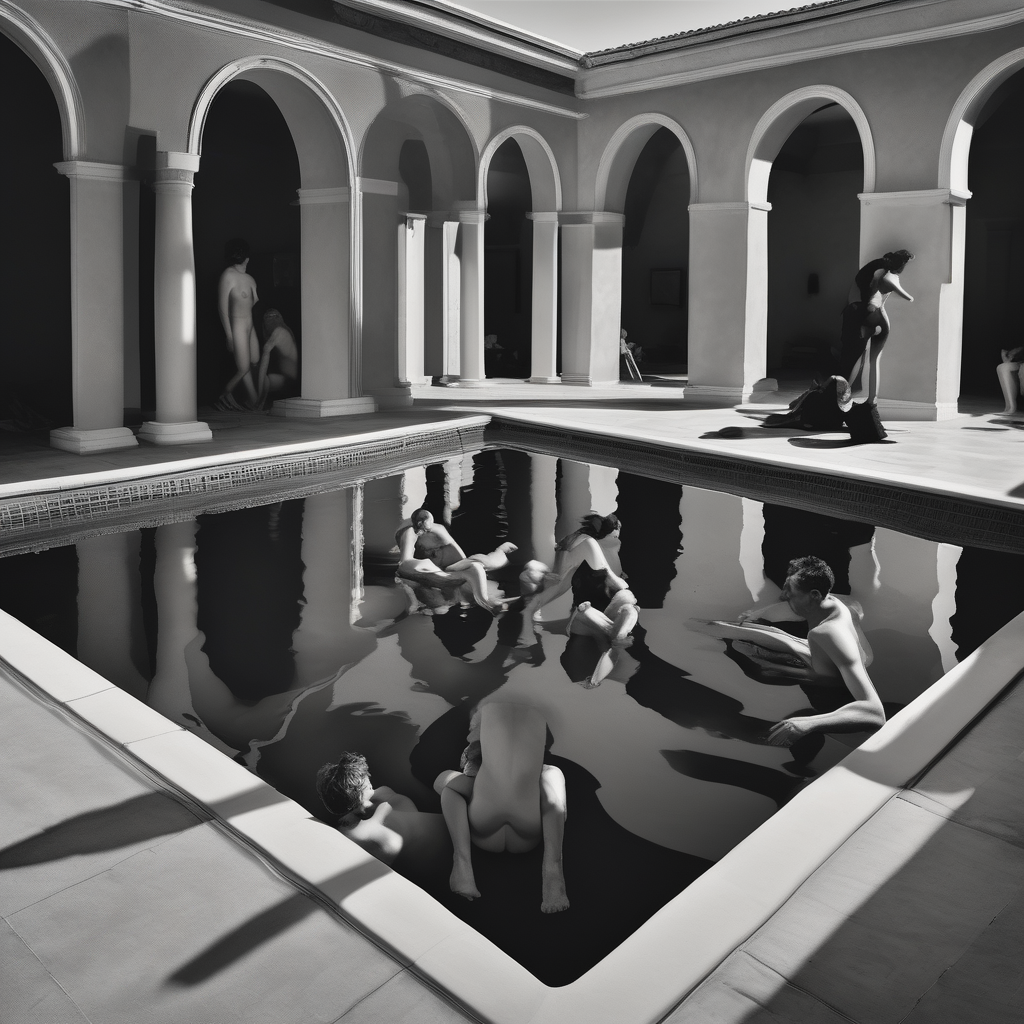

¡Generación con SDXL completada! Observa la mejora en detalle y realismo.


In [7]:
# Llamamos a la función para generar la imagen con Stable Diffusion XL
print(f"Generando imagen con SDXL para el prompt: '{prompt_xl}'...")
images_xl = generar_imagen_xl(prompt_xl)

# Mostramos la imagen generada
for img in images_xl:
    display(img)
print("¡Generación con SDXL completada! Observa la mejora en detalle y realismo.")